In [1]:
# DATASET SOURCE: https://archive-beta.ics.uci.edu/dataset/602/dry+bean+dataset
# WITH STUDENT ID: 260817

#STEPS FOLLOWED
# Importing necessary python libraries
# Loading the dataset
# Understanding what the dataset contains. Data info
# Data relationship visualisation
# Data training and testing
# Pre-processing
# Model integration Using KNN
# Performance metrics measurement
# Result visualization
# Extra Task: Modelling using SVM

In [188]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PolynomialFeatures, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

In [88]:
#Loading of dataset and gettting to understand it. Data exploration

# Download from DATASET SOURCE, copy the path and provide it as parameter to the 'read_excel()' function
df = pd.read_excel('/Users/mac/Desktop/Oluwatoyin/DryBeanDataset/Dry_Bean_Dataset.xlsx')  

# To get X and y
X = df.drop(columns='Class')
y = df['Class']


# Convert X and Y to numpy array
X_npArray = np.array(X)
y_npArray = np.array(y)
print(X_npArray)
print(y_npArray)

[[2.83950000e+04 6.10291000e+02 2.08178117e+02 ... 3.14728917e-03
  8.34222388e-01 9.98723889e-01]
 [2.87340000e+04 6.38018000e+02 2.00524796e+02 ... 3.56362371e-03
  9.09850506e-01 9.98430331e-01]
 [2.93800000e+04 6.24110000e+02 2.12826130e+02 ... 3.04773322e-03
  8.25870617e-01 9.99066137e-01]
 ...
 [4.21390000e+04 7.59321000e+02 2.81539928e+02 ... 1.88827064e-03
  6.76884164e-01 9.96767264e-01]
 [4.21470000e+04 7.63779000e+02 2.83382636e+02 ... 1.85202548e-03
  6.68236684e-01 9.95222420e-01]
 [4.21590000e+04 7.72237000e+02 2.95142741e+02 ... 1.63981171e-03
  6.16220592e-01 9.98179623e-01]]
['SEKER' 'SEKER' 'SEKER' ... 'DERMASON' 'DERMASON' 'DERMASON']


In [90]:
#EXPLORATION AND DATA ANALYSIS (EDA)
# Data overview
df.head() #print the first 5 rows

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [91]:
# Output total rows(entries) and columns(attributes)
df.shape

(13611, 17)

In [92]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [93]:
# each of the column data types
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [94]:
# Checking for the total sum of null values in our dataframe
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [130]:
# A description of the data
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063,3.532657
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366,1.828709
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687,0.000000
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703,2.000000
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386,3.000000
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883,5.000000
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733,6.000000


In [ ]:
#From this data overview we can see that:

#The dataset has 13611 rows and 17 columns
#All columns are numerical except "Class" column which will be our target
#There are no NULL values in the data thanks to which we have less work to do
#By looking at the description of the data we can come to the conclusion that our data will need standardization

In [131]:
# Unique members of the class attribute
df['Class'].unique()

array([5, 0, 1, 2, 4, 6, 3])

In [97]:
# no of each bean type in the class attribute
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [ ]:
#There is 7 unique types of beans in "Class" Column
#BOMBAY occurs the least amount of times in dataset
#DERMASON most often appears in our dataset

In [ ]:
# DATA VISUALIZATION STAGE

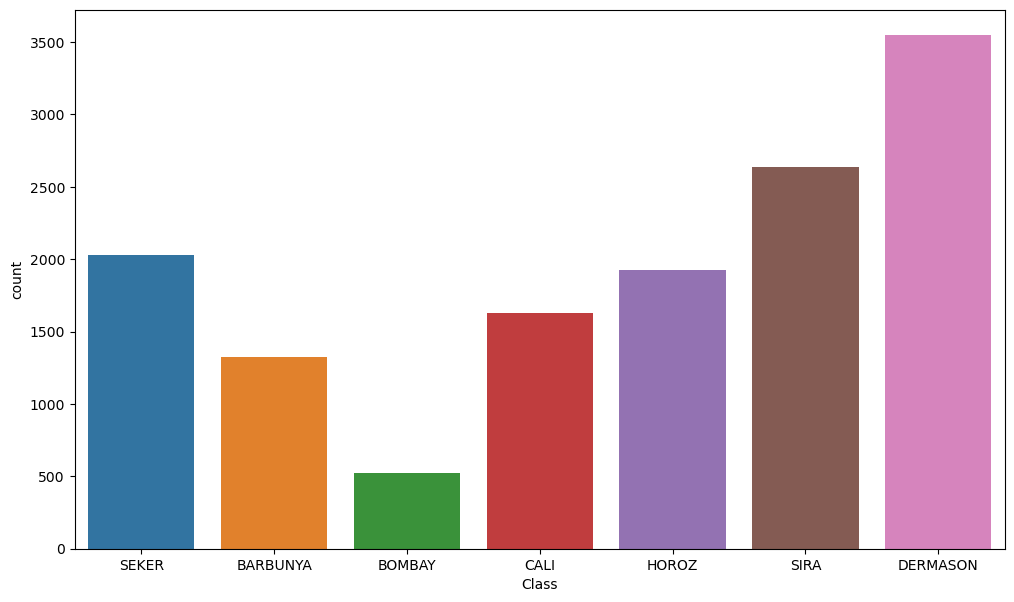

In [99]:
# Class column(attribute) visualization using countPlot function
plt.figure(figsize=(12,7))
sns.countplot(x='Class', data=df)
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

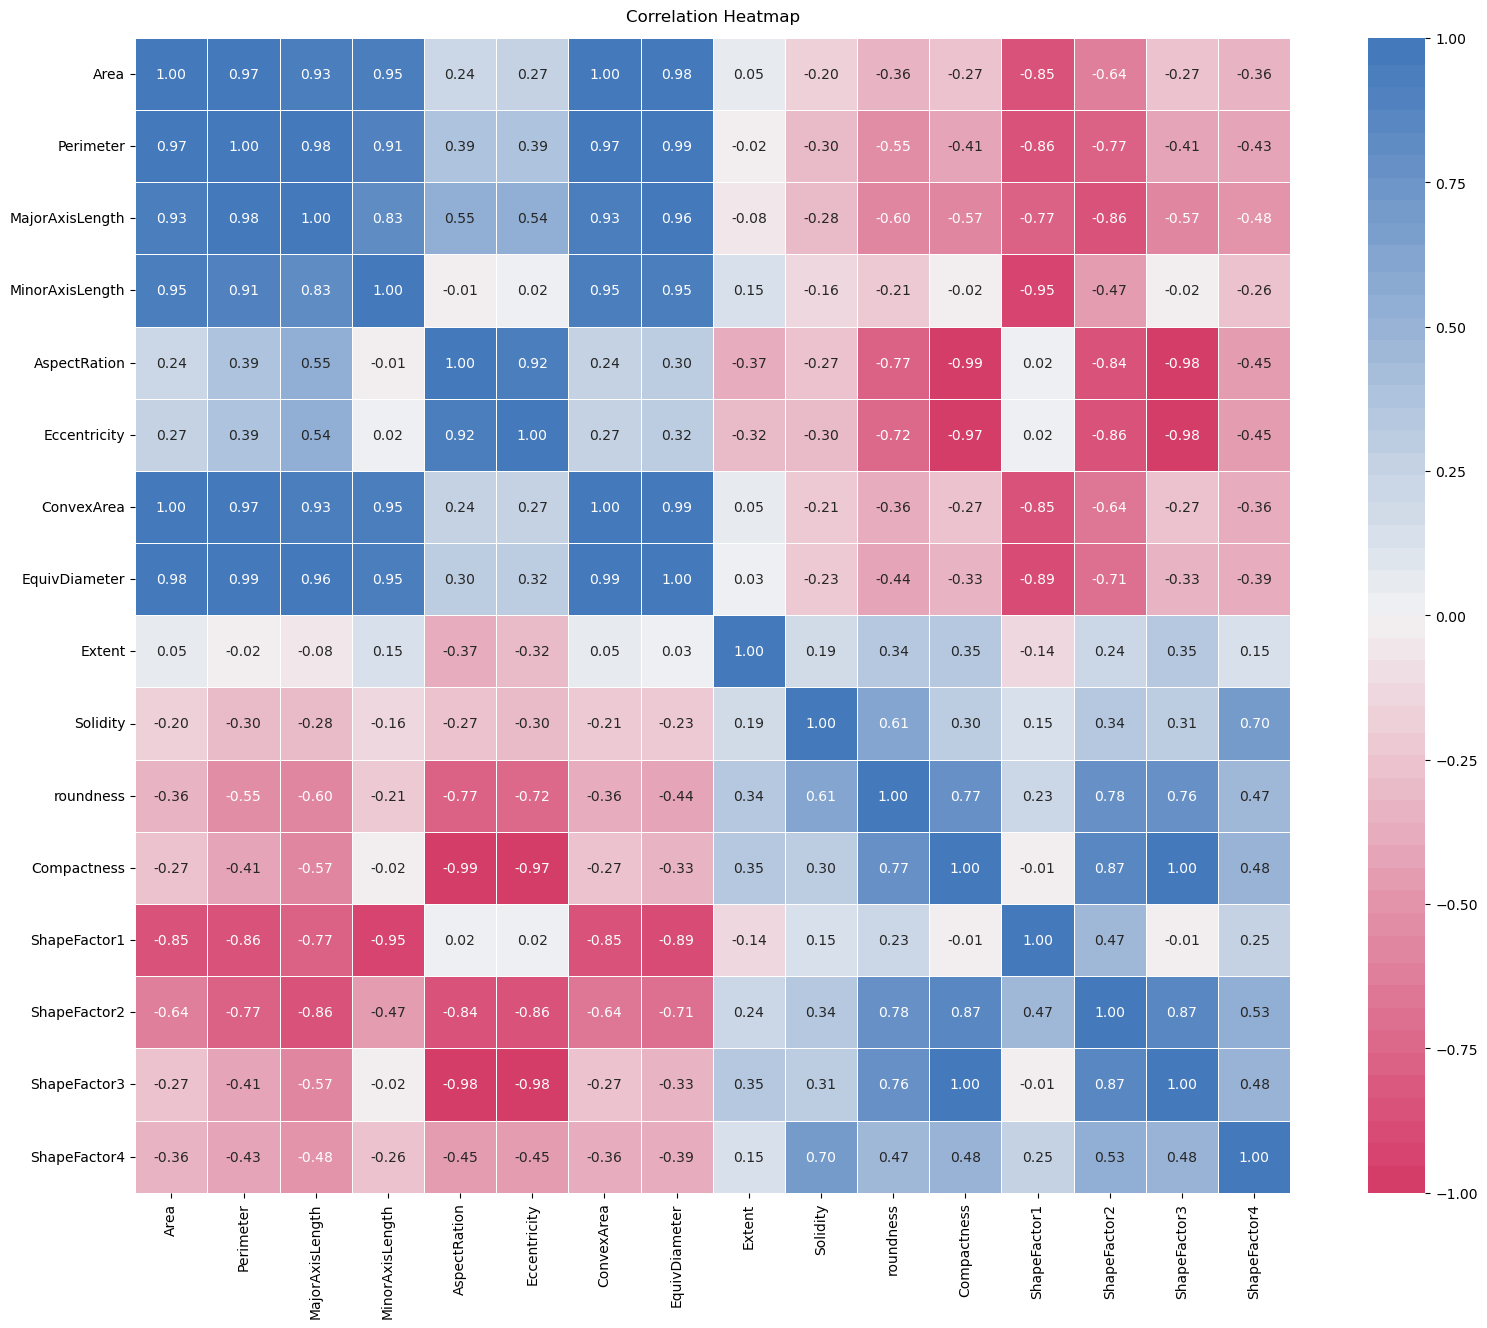

In [100]:
#Correlation matrix using pearson method, with heatmap for visualization
plt.figure(figsize=(20,15))
heatmap = sns.heatmap(df.corr(method = 'pearson', numeric_only = True), vmin=-1, vmax=1, center = 0, annot=True, fmt=".2f", linewidth=.5, cmap = sns.diverging_palette(0, 250, n=50),
    square = True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [ ]:
#The following correlations were noted:

#Area: Perimeter, MajorAxisLength, MinorAxisLength, ConvexArea, EquivDiameter
#Perimeter: Area, MajorAxisLength, MinorAxisLength, ConvexArea, EquivDiameter
#MajorAxisLength: Area, Perimeter, MinorAxisLength, ConvexArea, EquivDiameter
#MinorAxisLength: Area, Perimeter, MajorAxisLength, ConvexArea, EquivDiameter
#ConvexArea: Area, Perimeter, MajorAxisLength, MinorAxisLength, EquivDiameter
#EquivDiameter: Area, Perimeter, MajorAxisLength, MinorAxisLength, ConvexArea

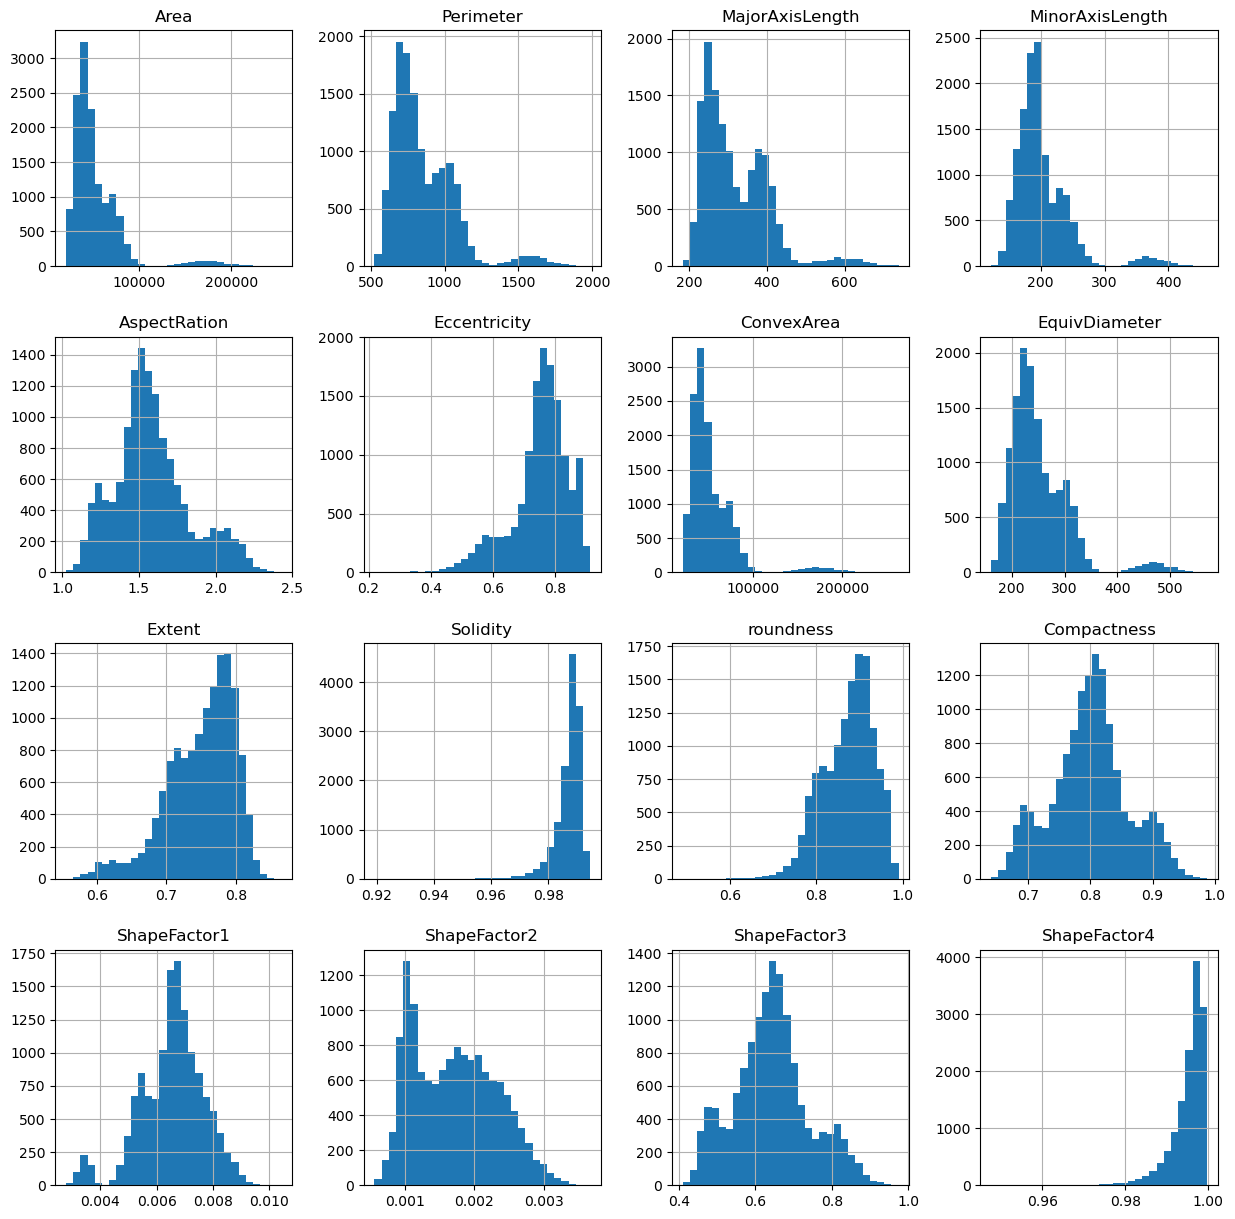

In [101]:
# Visualizing data on an histogram
df.hist(bins=30, figsize=(15,15))
plt.show()

<Axes: >

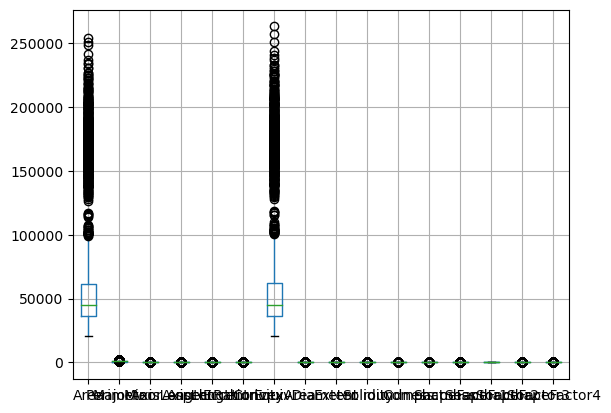

In [79]:
#Box plot: To measure how well the data are distributed in the dataset. A box plot is a method for 
#graphically depicting groups of numerical data through their quartiles. 
df.boxplot()

In [ ]:
# Data preprocessing and feature engineering stage

In [102]:
# Label Encoding

# "Class" column is str (in object form) so we need to convert the labels into a numeric form.
labelencoder = LabelEncoder()
df["Class"] = labelencoder.fit_transform(df['Class'])

df.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,5
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,5
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,5
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,5
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,5


In [103]:
# Splitting Data Into Train and Test Subsets
X = df.drop(columns='Class')
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

[0.06374535 0.07574285 0.07237014 0.0749402  0.07229703 0.07062112
 0.06495513 0.07158578 0.01429831 0.01806744 0.06053496 0.07574012
 0.08220288 0.07037449 0.08486528 0.02765892]


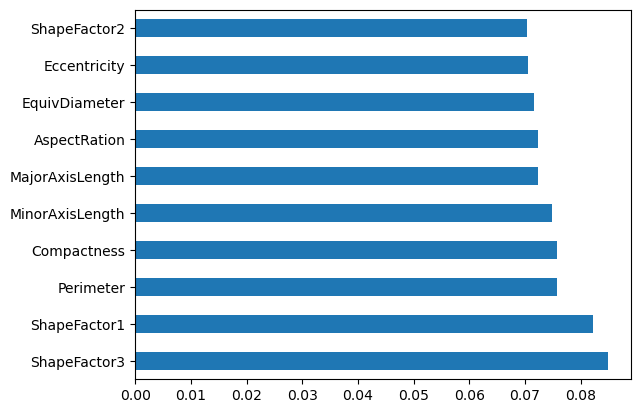

In [48]:
# Calculating Feature Importance
model = ExtraTreesClassifier(n_estimators=500, random_state=42)
model.fit(X,y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [114]:
# Standarizing Features
scaler_X = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)


In [135]:
# Model Training
# My primary classification model is K Nearest Neighbor (KNN)
knnModel = KNeighborsClassifier(n_neighbors = 5, algorithm = 'kd_tree', p=2)
knnModel.fit(X_train_scaled, y_train)
y_pred = knnModel.predict(X_test_scaled)

In [186]:
# output/export the predicted class label as .csv file  

pred_targeted_label = pd.DataFrame({"Predicted Class":labelencoder.inverse_transform(y_pred)})
pred_targeted_label.to_csv('predicted_class_label.csv')

In [185]:
#Classification Report and Accuracy Score for KNN
print('Accuracy: %.5f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=np.unique(labelencoder.inverse_transform(y))))

Accuracy: 0.92325
              precision    recall  f1-score   support

    BARBUNYA       0.96      0.90      0.93       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.92      0.96      0.94       317
    DERMASON       0.89      0.91      0.90       671
       HOROZ       0.97      0.95      0.96       408
       SEKER       0.97      0.95      0.96       413
        SIRA       0.86      0.87      0.86       536

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.94      2723
weighted avg       0.92      0.92      0.92      2723



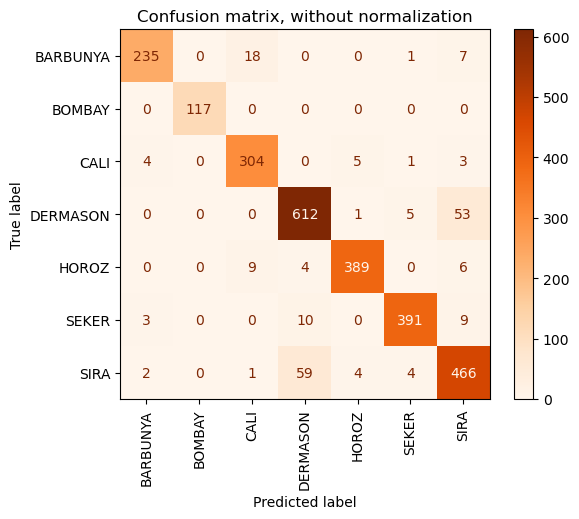

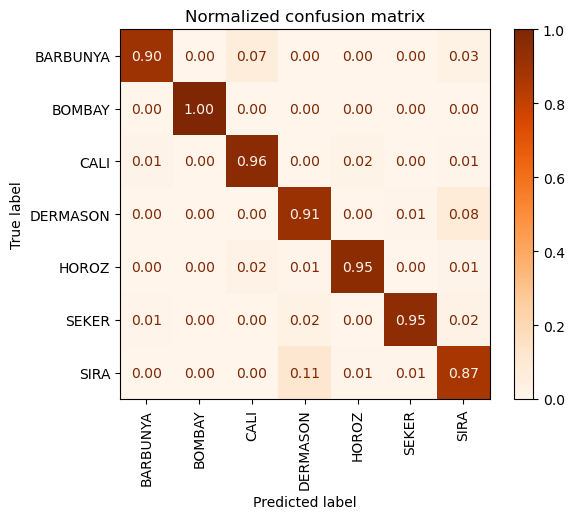

In [110]:
#Classification Visualization Using ConfusionMatrixDisplay
titles_options = [
    ("Confusion matrix, without normalization", None,'.0f'),
    ("Normalized confusion matrix", "true", '.2f'),
]
for title, normalize, values_format in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        knnModel,
        X_test_scaled,
        y_test,
        display_labels=np.unique(labelencoder.inverse_transform(y)),
        cmap=plt.cm.Oranges,
        normalize=normalize,
        xticks_rotation='vertical',
        values_format= values_format
    )
    disp.ax_.set_title(title)
    
plt.show()

In [191]:
# EXTRA TASK: Using Support vector machines(SVM) model
svmClassModel = svm.SVC()
svmClassModel.fit(X_train_scaled, y_train)
y_pred_forSVM = svmClassModel.predict(X_test_scaled)

In [197]:
#Classification Report and Accuracy Score for SVM
print('Accuracy: %.5f' % accuracy_score(y_test, y_pred_forSVM))
print(classification_report(y_test, y_pred_forSVM, target_names=np.unique(labelencoder.inverse_transform(y))))

Accuracy: 0.93390
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.92      0.93       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.94      0.95      0.94       317
    DERMASON       0.91      0.93      0.92       671
       HOROZ       0.98      0.96      0.97       408
       SEKER       0.97      0.95      0.96       413
        SIRA       0.88      0.90      0.89       536

    accuracy                           0.93      2723
   macro avg       0.95      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



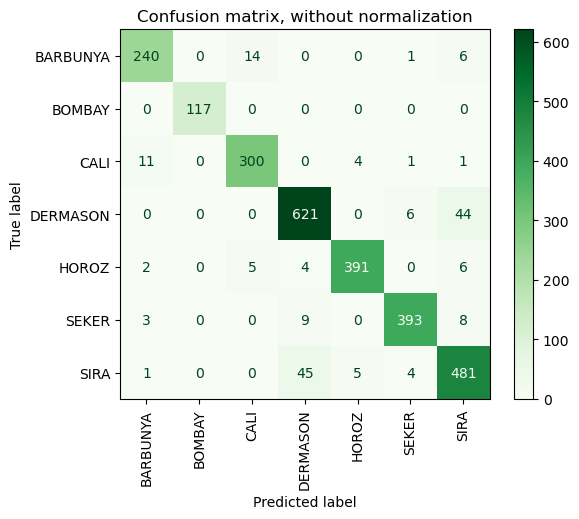

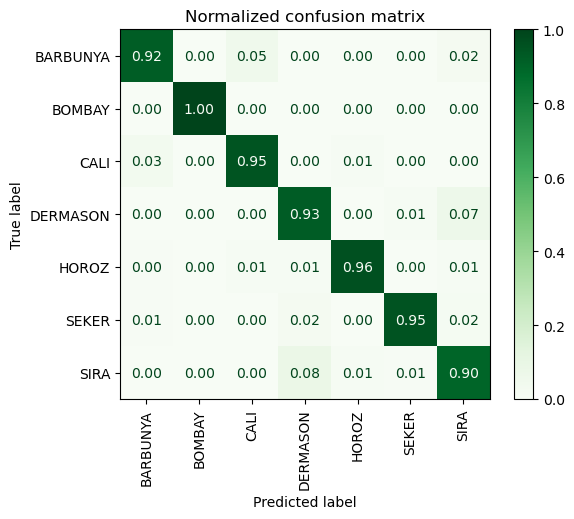

In [196]:
#Classification Visualization Using ConfusionMatrixDisplay
titles_options = [
    ("Confusion matrix, without normalization", None,'.0f'),
    ("Normalized confusion matrix", "true", '.2f'),
]
for title, normalize, values_format in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        svmClassModel,
        X_test_scaled,
        y_test,
        display_labels=np.unique(labelencoder.inverse_transform(y)),
        cmap=plt.cm.Greens,
        normalize=normalize,
        xticks_rotation='vertical',
        values_format= values_format
    )
    disp.ax_.set_title(title)
    
plt.show()